In [13]:
# !pip install matplotlib

# !pip install plotly tkhtmlview
# !pip install pywebview

# !pip install matplotlib
# !pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
import os

os.chdir("..")
os.chdir("..")
os.chdir("..")

!dir

app	  docs	       pyproject.toml  requirements.txt  trash
database  poetry.lock  README.md       tests


In [3]:
import pandas as pd

df = pd.read_csv("database/infos/game_data_hangman.csv")
df.tail(10)

,datetime,word,hint,won,difficulty,total_attempts,used_attempts,correct_guessed_letters,incorrect_guessed_letters,correct_guesses,incorrect_guesses,time_taken,game_name,clicks_on_guess,category,sub_category,id_game,list_of_typed_letters
588,2025-05-13T19:59:35,double,dobro,True,0.000000,6,0,"d,o,u,b,l,e",NaN,NaN,NaN,10.002635,hangman,1.0,adjetivos,descrições_1,636d4a5a2b929e48,"d,o,u,b,l,e"
589,2025-05-13T20:03:26,six,seis,True,0.000000,6,0,"s,i,x",NaN,NaN,NaN,3.000673,hangman,1.0,sistemas,numerais_cardinais,ff9e2629db8b9b0,"s,i,x"
590,2025-05-13T20:04:59,to snow,hevar,False,1.000000,6,6,"t,o,s,o,w","g,h,l,i,x,z",NaN,NaN,64.015710,hangman,9.0,ambiente,tempo,ff9e2629db8b9b0,"t,o,g,h,w,s,h,l,i,z,x"
591,2025-05-13T20:05:28,to know,saber,True,0.000000,6,0,"t,o,k,n,o,w",NaN,NaN,NaN,28.158048,hangman,2.0,verbos,ensinar_e_aprender,ff9e2629db8b9b0,"k,n,o,w,t"
592,2025-05-13T20:07:30,what material is it made of?,De que material é feito?,True,0.666667,6,4,"w,h,a,t,m,a,t,e,r,i,a,l,i,s,i,t,m,a,d,e,o,f","k,u,c,z",NaN,NaN,122.145913,hangman,18.0,compras,acessórios,ff9e2629db8b9b0,"t,o,m,a,k,e,s,w,h,r,i,a,l,k,c,s,u,h,w,e,a,z,f,r,d"
593,2025-05-13T20:08:56,disease,a doença,False,1.000000,6,6,"i,s,e,a,s,e","t,f,l,r,k,b",NaN,NaN,85.760260,hangman,11.0,saude,problemas_de_saude,ff9e2629db8b9b0,"s,e,k,b,a,t,e,r,l,i,f"
594,2025-05-13T20:10:24,to take off,descolar,True,0.333333,6,2,"t,o,t,a,k,e,o,f,f","u,v",NaN,NaN,26.008268,hangman,6.0,transportes,transportes_aéreos,ff9e2629db8b9b0,"t,o,u,t,v,e,a,k,f,f"
595,2025-05-13T20:11:10,in front of,na frente de,True,0.000000,6,0,"i,n,f,r,o,n,t,o,f",NaN,NaN,NaN,21.005880,hangman,3.0,outras_partes_do_discurso,preposições,ff9e2629db8b9b0,"t,o,f,r,o,n,t,o,f,o,i"
596,2025-05-13T20:12:35,we need to take a urine sample.,Precisamos recolher uma amostra de urina.,True,0.166667,6,1,"w,e,n,e,e,d,t,o,t,a,k,e,a,u,r,i,n,e,s,a,m,p,l,e",c,NaN,NaN,63.875312,hangman,9.0,saúde,tratamento,ff9e2629db8b9b0,"u,r,i,n,e,d,w,t,o,a,k,m,s,k,c,p,l"
597,2025-05-13T20:13:39,the stove is broken.,O forno está estragado.,False,1.000000,6,6,"t,h,e,s,t,o,e,i,s,b,r,o,k,e,n","g,w,a,c,l,f",NaN,NaN,64.092711,hangman,7.0,serviços,reparações,ff9e2629db8b9b0,"t,h,e,f,o,r,n,i,s,b,r,e,a,c,k,i,n,g,n,c,r,w,h,l"


In [4]:
print(f"Palavras vistas {len(df["word"].unique())}")

Palavras vistas 320


In [5]:
# df.fillna(0, inplace=True)
df["correct_guessed_letters"] = df["correct_guessed_letters"].fillna("")
df["incorrect_guessed_letters"] = df["incorrect_guessed_letters"].fillna("   ")
df["time_taken"] = df["time_taken"].fillna(0)

qtd_correct_guessed_letters = df["correct_guessed_letters"].apply(lambda x: len(x.replace(",", "")))
qtd_incorrect_guessed_letters = df["incorrect_guessed_letters"].apply(lambda x: len(x.replace(",", "")))



In [6]:
max_time = df['time_taken'].max()

difficulty_words_wrong = qtd_incorrect_guessed_letters / qtd_correct_guessed_letters
difficulty_time = (df['time_taken'] / max_time) * 10

df['difficulty'] = difficulty_words_wrong+difficulty_time

In [7]:
df.groupby("word")["difficulty"].mean().sort_values(ascending=False).head(10)#.reset_index().rename(columns={"difficulty": "dificuldade"})

word
ship                               inf
sink                               inf
stool                              inf
dresser                            inf
strong                             inf
messy                              inf
young                              inf
|uxurious                     9.072353
could i/l borrow your pen?    7.871421
furniture                     7.545126
Name: difficulty, dtype: float64

In [8]:
df["word"].unique()

array(['cramped', 'clean', 'noisy', 'dusty', 'contemporary',
       'comfortable', 'quiet', 'cozy', 'messy', 'uncomfortable',
       'temporary', 'abandoned', 'provincial', 'spacious', '|uxurious',
       'furnished', 'hourglass', 'statuette', 'bedding', 'frame',
       'candle', 'tinsel', 'drapes', 'towel', 'ornament', 'tablecloth',
       'napkin', 'flowerpot', 'blanket', 'candlestick', 'vase', 'carpet',
       'pillowcase', 'decoration', 'wallpaper', 'bedsheet',
       'window shade', 'to decorate', 'wreath', 'chandelier', 'pillow',
       'hallway', 'laundry', 'loft', 'toilet', 'bedroom', 'basement',
       'living room', 'larder', 'attic', 'unknown', 'spontaneous',
       'unqualified', 'lame', 'illiterate', 'well-known', 'irrational',
       'anonymous', 'unpopular', 'weak', 'successful', 'able', 'crazy',
       'ironic', 'dead', 'qualified', 'rich', 'literate', 'alive', 'mute',
       'pregnant', 'objective', 'naked', 'myopic', 'unable', 'strong',
       'subjective', 'free', 'd

In [9]:
# df['difficulty'].plot()

In [10]:
# df.dropna(subset="category", inplace=True)
# df["category"] = df["category"].astype(int)



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def gra_stydy_daily(ax: plt.Axes, df):
    df_word_count_per_day = df.groupby("date").agg(word_count=("word", "count")).reset_index()

    start_date = df["date"].min()
    end_date = df["date"].max()
    full_range = pd.date_range(start=start_date, end=end_date)

    df_all_days = pd.DataFrame({"date": full_range.date})
    df_all_days = df_all_days.merge(df_word_count_per_day, on="date", how="left")
    df_all_days["word_count"] = df_all_days["word_count"].fillna(0).astype(int)

    ax.bar(df_all_days["date"], df_all_days["word_count"])
    ax.set_title("Palavras Estudadas por Dia (Incluindo Dias Sem Estudo)", fontsize=14)
    ax.set_xlabel("Data")
    ax.set_ylabel("Quantidade de Palavras")

    # Aplica rotação nos ticks do eixo X
    ax.tick_params(axis='x', rotation=45)

def plot_div(ax, df:pd.DataFrame):
     # Gráfico de Pizza
    df_category_word_mean = df.groupby("category").agg(
        category_word_mean=("word", "count")
    ).reset_index()

    
    # df_category_word_mean.plot(kind="pie", x="category", y="category_word_mean")
    ax.pie(x=df_category_word_mean["category_word_mean"], labels=df_category_word_mean["category"], autopct='%1.1f%%')
    ax.set_title("Palavras aprendias por categoria")


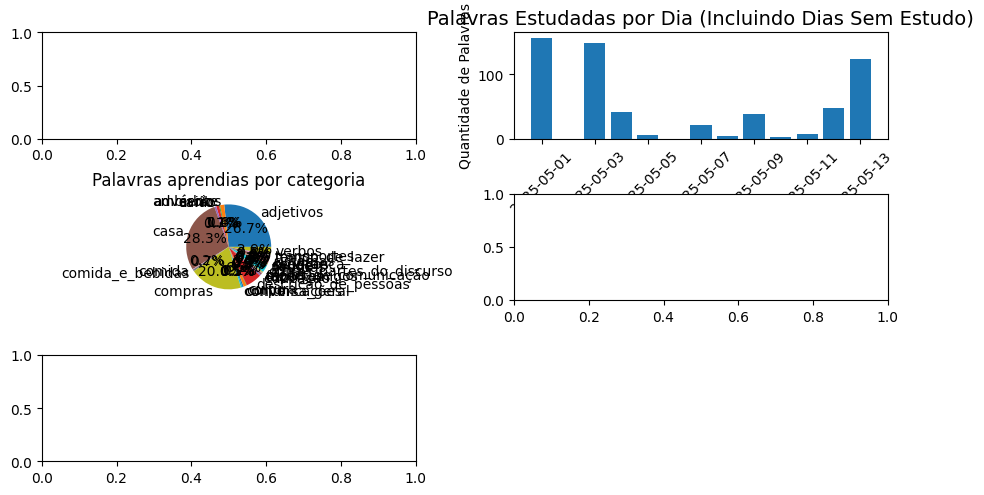

In [15]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns

# Função para atualizar todos os gráficos
def atualizar_graficos(root, df:pd.DataFrame):
    # Janela principal
    # Filtro de ano
    frame_top = ttk.Frame(root)
    frame_top.pack(fill='x', padx=10, pady=5)

    # Painel KPI (percentual)
    frame_kpi = ttk.Frame(root)
    frame_kpi.pack(fill='x', padx=10, pady=5)

    label_kpi = ttk.Label(frame_kpi, text="Crescimento: --%", font=("Arial", 18), foreground='green')
    label_kpi.pack()


    ttk.Label(frame_top, text="Ano:").pack(side='left')
    combo_ano = ttk.Combobox(frame_top, values=sorted([1, 2, 3, 4, 5, 6]), state='readonly')
    combo_ano.set(4)
    combo_ano.pack(side='left', padx=5)

    ttk.Button(frame_top, text="Atualizar", command=atualizar_graficos).pack(side='left', padx=5)

    # Área dos gráficos
    frame_chart = ttk.Frame(root)
    frame_chart.pack(fill='both', expand=True)

    fig, axs = plt.subplots(3, 2, figsize=(10, 8))
    fig.tight_layout(pad=4)
    fig.delaxes(axs[2][1])  # Remove o sexto espaço não utilizado

    canvas = FigureCanvasTkAgg(fig, master=frame_chart)
    canvas.get_tk_widget().pack(fill='both', expand=True)



    # ano = int(combo_ano.get())
    # df = dados[dados['Ano'] == ano]
    # categorias = df['Categoria']
    # valores = df['Valor']
    # qtds = df['Qtd']

    for ax in fig.axes:
        ax.clear()

    gra_stydy_daily(fig.axes[1], df)
    plot_div(fig.axes[2], df)


    # Gráfico de Barras
    # gra_barras(fig.axes[0], categorias, valores)
    # gra_linhas(fig.axes[1], categorias, valores)
    # gra_pizza(fig.axes[2], categorias, valores)
    # gra_disper(fig.axes[3], categorias, valores)

    # # # Gráfico de Área (empilhado com Qtd)
    # fig.axes[4].stackplot(categorias, valores, qtds, labels=['Valor', 'Qtd'])
    # fig.axes[4].legend()
    # fig.axes[4].set_title("Gráfico de Área Empilhado")

    #     # Atualizar KPI (crescimento percentual em relação a 2023)
    # if ano != 2023:
    #     total_atual = dados[dados['Ano'] == ano]['Valor'].sum()
    #     total_2023 = dados[dados['Ano'] == 2023]['Valor'].sum()
    #     if total_2023 > 0:
    #         crescimento = ((total_atual - total_2023) / total_2023) * 100
    #         cor = "green" if crescimento >= 0 else "red"
    #         label_kpi.config(text=f"Crescimento: {crescimento:.1f}%", foreground=cor)

    canvas.draw()

# Conversão da data
df["datetime"] = pd.to_datetime(df["datetime"])
df["date"] = df["datetime"].dt.date

root = tk.Tk()
root.title("Painel Multi-Gráficos - Estilo Power BI")
root.geometry("1000x600")
atualizar_graficos(root, df)
root.mainloop()

In [ ]:
# df_word_count_per_day.plot(kind="bar", x="datetime_per_day", y="word_count")

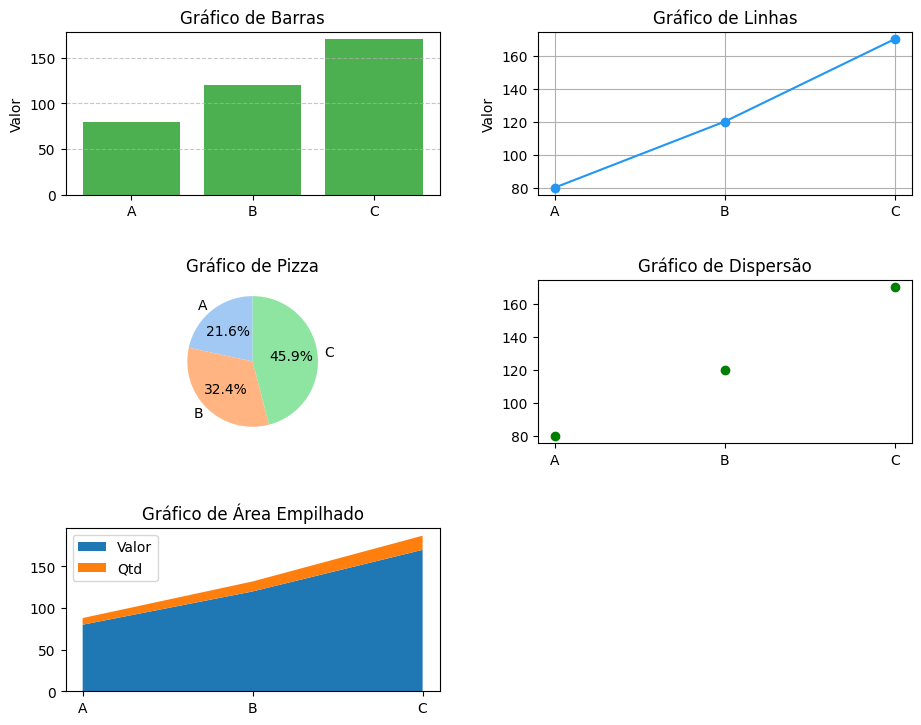

In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Dados de exemplo
dados = pd.DataFrame({
    'Categoria': ['A', 'B', 'C', 'A', 'B', 'C'],
    'Valor': [100, 150, 200, 80, 120, 170],
    'Qtd': [10, 15, 20, 8, 12, 17],
    'Ano': [2023, 2023, 2023, 2024, 2024, 2024]
})


def gra_barras(ax, categorias, valores):
    ax.bar(categorias, valores, color="#4CAF50")
    ax.set_title("Gráfico de Barras")
    ax.set_ylabel("Valor")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

def gra_linhas(ax, categorias, valores):
    ax.plot(categorias, valores, marker='o', linestyle='-', color="#2196F3")
    ax.set_title("Gráfico de Linhas")
    ax.set_ylabel("Valor")
    ax.grid(True)

def gra_pizza(ax, categorias, valores):
    ax.pie(valores, labels=categorias, autopct="%1.1f%%", startangle=90,
           colors=sns.color_palette("pastel"))
    ax.set_title("Gráfico de Pizza")

# Função para atualizar todos os gráficos
def atualizar_graficos():
    ano = int(combo_ano.get())
    df = dados[dados['Ano'] == ano]
    categorias = df['Categoria']
    valores = df['Valor']
    qtds = df['Qtd']

    for ax in fig.axes:
        ax.clear()

    # Gráfico de Barras
    # gra_barras()
    # fig.axes[0].bar(categorias, valores)
    # fig.axes[0].set_title("Gráfico de Barras")

    # # Gráfico de Linhas
    # fig.axes[1].plot(categorias, valores, marker='o')
    # fig.axes[1].set_title("Gráfico de Linhas")

    # # Gráfico de Pizza
    # # df_category_word_mean.plot(kind="pie", x="category", y="category_word_mean")
    # fig.axes[2].pie(x=df_category_word_mean["category_word_mean"], labels=df_category_word_mean["category"], autopct='%1.1f%%')
    # # fig.axes[2].legend()
    # fig.axes[2].set_title("Palavras aprendias por categoria")
    

    # Gráfico de Dispersão
    fig.axes[3].scatter(categorias, valores, color='green')
    fig.axes[3].set_title("Gráfico de Dispersão")

    # Gráfico de Área (empilhado com Qtd)
    fig.axes[4].stackplot(categorias, valores, qtds, labels=['Valor', 'Qtd'])
    fig.axes[4].legend()
    fig.axes[4].set_title("Gráfico de Área Empilhado")

        # Atualizar KPI (crescimento percentual em relação a 2023)
    if ano != 2023:
        total_atual = dados[dados['Ano'] == ano]['Valor'].sum()
        total_2023 = dados[dados['Ano'] == 2023]['Valor'].sum()
        if total_2023 > 0:
            crescimento = ((total_atual - total_2023) / total_2023) * 100
            cor = "green" if crescimento >= 0 else "red"
            label_kpi.config(text=f"Crescimento: {crescimento:.1f}%", foreground=cor)

    canvas.draw()

# Janela principal
root = tk.Tk()
root.title("Painel Multi-Gráficos - Estilo Power BI")
root.geometry("1000x700")

# Filtro de ano
frame_top = ttk.Frame(root)
frame_top.pack(fill='x', padx=10, pady=5)

# Painel KPI (percentual)
frame_kpi = ttk.Frame(root)
frame_kpi.pack(fill='x', padx=10, pady=5)

label_kpi = ttk.Label(frame_kpi, text="Crescimento: --%", font=("Arial", 18), foreground='green')
label_kpi.pack()


ttk.Label(frame_top, text="Ano:").pack(side='left')
combo_ano = ttk.Combobox(frame_top, values=sorted(dados['Ano'].unique()), state='readonly')
combo_ano.set(dados['Ano'].max())
combo_ano.pack(side='left', padx=5)

ttk.Button(frame_top, text="Atualizar", command=atualizar_graficos).pack(side='left', padx=5)

# Área dos gráficos
frame_chart = ttk.Frame(root)
frame_chart.pack(fill='both', expand=True)

fig, axs = plt.subplots(3, 2, figsize=(10, 8))
fig.tight_layout(pad=4)
fig.delaxes(axs[2][1])  # Remove o sexto espaço não utilizado

canvas = FigureCanvasTkAgg(fig, master=frame_chart)
canvas.get_tk_widget().pack(fill='both', expand=True)

# Primeira renderização
atualizar_graficos()

root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Dados simulados
dados = pd.DataFrame({
    'Categoria': ['A', 'B', 'C'],
    'Valor_2023': [100, 150, 200],
    'Valor_2024': [110, 180, 220],
})

# Função para calcular e atualizar o KPI
def atualizar_kpi():
    total_2023 = dados['Valor_2023'].sum()
    total_2024 = dados['Valor_2024'].sum()
    crescimento = ((total_2024 - total_2023) / total_2023) * 100
    label_kpi.config(text=f"Crescimento: {crescimento:.1f}%")

# Função para atualizar o gráfico
def atualizar_graficos():
    fig.clear()
    ax = fig.add_subplot(111)

    categorias = dados['Categoria']
    valores_2023 = dados['Valor_2023']
    valores_2024 = dados['Valor_2024']

    ax.bar(categorias, valores_2023, label='2023')
    ax.bar(categorias, valores_2024, label='2024', alpha=0.7)
    ax.set_title("Comparativo de Valores")
    ax.legend()

    canvas.draw()
    atualizar_kpi()

# Janela principal
root = tk.Tk()
root.title("Dashboard Estilo Power BI com KPI")
root.geometry("800x600")

# Frame superior com KPI
frame_top = ttk.Frame(root)
frame_top.pack(fill='x', padx=10, pady=10)

label_kpi = ttk.Label(frame_top, text="Crescimento: --%", font=("Arial", 20), foreground='green')
label_kpi.pack()
    
# Frame para o gráfico
frame_chart = ttk.Frame(root)
frame_chart.pack(fill='both', expand=True)

fig = plt.Figure(figsize=(6, 4), dpi=100)
canvas = FigureCanvasTkAgg(fig, master=frame_chart)
canvas.get_tk_widget().pack(fill='both', expand=True)

# Botão de atualização
ttk.Button(root, text="Atualizar", command=atualizar_graficos).pack(pady=5)

# Primeira renderização
atualizar_graficos()

root.mainloop()
